In [2]:
import codecs
from bs4 import BeautifulSoup
import re
import sys
import time
import pandas as pd
from unidecode import unidecode
from nltk import sent_tokenize

sys.path.insert(0, '../../base_codes')
sys.path.insert(0, '../../data_specific_codes')
sys.path.insert(0, '../../utility_codes')

from RE_init import *
from main_functions import *
from utility_functions import *
from SDDb_utility_functions import *

stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

%reload_ext autoreload
%autoreload 2


based_dir = ''
file_input_name = 'dreams.csv'
file_input = based_dir + file_input_name  

def read_df_rel(based_dir, file_input_name):
    file_input = based_dir + file_input_name    
    delim=","
    df = pd.read_csv(file_input,delimiter=delim,header=0)        
    return df

df_all_dreams = read_df_rel(based_dir, file_input_name)

In [3]:
# df_all_dreams['content'][100]
df_all_dreams = df_all_dreams.rename(columns={'content': 'text'})


In [7]:
# encoding: utf-8
import codecs
import bs4
from bs4 import BeautifulSoup
import re
import sys
import time
import pandas as pd
from unidecode import unidecode
from nltk import sent_tokenize

sys.path.insert(0, '../../base_codes')
sys.path.insert(0, '../../data_specific_codes')
sys.path.insert(0, '../../utility_codes')

from RE_init import *
from main_functions import *
from utility_functions import *
from SDDb_utility_functions import *

stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

%reload_ext autoreload
%autoreload 2


based_dir = ''
file_input_name = 'Sleep_and_Dream_Database_All_Results.html'
file_input = based_dir + file_input_name    

f=codecs.open(file_input, 'r', encoding='utf-8')#'iso-8859-1')#'utf-8')
html = f.read()
start_time = time.time()
parsed_html = BeautifulSoup(html)
print "Execution Time: ", time.time()-start_time, " seconds."
start_time = time.time()
count = 0
list_final_res = []
html_search_results = parsed_html.body.find('ul', attrs={'class':'list_result word-search'})
for ind, item in enumerate(html_search_results.find_all('li')):
    dream_text = item.find('div', attrs={'class':'searchhittext'}).text.strip(' \t\n\r').decode('utf-8')
    dream_text = re.sub(u"(\u2018|\u2019|\u201c|\u201d|\u0060|\u00b4)", "'", dream_text)
    dream_text = dream_text.encode('ascii', 'ignore')
    dream_title = item.find('strong').text
    dream_header_text = item.find('div', attrs={'class':'searchhitheader'}).text
    dream_header_text = dream_header_text.decode('utf-8').encode('ascii', 'ignore')
    dream_date = re.findall(r'\[(.*?)\]', dream_header_text)[0]
    dream_person_id = item.find('a', attrs={'class':'list_result_anchor'}).text
    list_final_res.append([ind, dream_person_id, dream_date, dream_title, dream_text])
    count += 1
print count
print "Execution Time: ", time.time()-start_time
df_texts = pd.DataFrame(list_final_res, columns = ["index", "person id", "answer date", "title", "text"])
print "total number of raw dream reports: ", len(df_texts)

Execution Time:  83.1666550636  seconds.
40435
Execution Time:  22.3328020573
total number of raw dream reports:  40435


In [6]:
df_all_dreams.drop_duplicates(subset=["text"], inplace=True)
print len(df_all_dreams)

26093


In [9]:
df_texts.drop_duplicates(subset=["text"], inplace=True)
print len(df_texts)

33453


In [10]:
result = pd.concat([df_texts, df_all_dreams])
print len(result)

59546


In [12]:
result.drop_duplicates(subset=["text"], inplace=True)
print len(result)

58095


In [13]:
result.drop_duplicates(subset=["text"], inplace=True)
start_time = time.time()
for ind, row in result.iterrows():
    post = row["text"]
    num_sentences = len(sent_tokenize(post))    
    post_clean = clean_sent(post)
    if num_sentences == 1 and has_dot_issue(post_clean):
        post_clean = fix_dot_issue(post_clean)
    result.set_value(ind,'text',post_clean)
print "Execution Time: ", time.time()-start_time, " seconds."    
result.to_csv(based_dir + 'all_dreams_two.csv',  index = False, encoding='ascii')
print "total number of dream reports after removing duplicates: ", len(result)

Execution Time:  142.615994215  seconds.
total number of dream reports after removing duplicates:  58095


In [86]:
df_new_reports_five = result[result.apply(lambda x: is_any_entities_present(x["text"], set_five), axis=1)]
print "number of new reports:", len(df_new_reports_five)

number of new reports: 1933


In [76]:
df_new_reports_four = result[result.apply(lambda x: is_any_entities_present(x["text"], set_four), axis=1)]
print "number of new reports:", len(df_new_reports_four)

number of new reports: 1987


In [84]:
df_new_reports_test = result[result.apply(lambda x: is_any_entities_present(x["text"], ["north","east","west","south"]), axis=1)]
print "number of new reports:", len(df_new_reports_test)

number of new reports: 1214


In [95]:
mains = result[result.apply(lambda x: is_any_entities_present(x["text"], set_three), axis=1)]
mains.drop_duplicates(subset=["text"], inplace=True)
print "number of new reports:", len(mains)

number of new reports: 13093


# Simple Classifier

In [27]:
train=[]
label=[]
for index,row in df_new_reports_travel.iterrows():
    train.append(row['text'])
    label.append(1)

In [29]:
import random
N=len(result)
i=0
for index,row in result.iterrows():
    i=i+1
    if i<274:
        train.append(row['text'])
        label.append(0)
    else:
        break

In [30]:
len(train)

547

In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
import nltk
import re
import string
stop_words = text.ENGLISH_STOP_WORDS
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # what kind of stemming algorithm to use?
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import re
vectorizer = CountVectorizer(stop_words=stop_words)
X_train_counts = vectorizer.fit_transform(train)
print X_train_counts.shape
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, label)


(547, 6724)


In [32]:
test=[]
number=0

number=0
for index, row in result.iterrows():
    if number<275:
        number=number+1
    elif number<400:
        number=number+1
        test.append(df_texts['text'][index])
    else:
        break

In [33]:
X_new_counts = vectorizer.transform(test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)



# Sentence similarity measurement
The idea here is to measure the similarity between two sentences and then try to plot story based on vectors we have.


In [18]:
import tensorflow_hub as hub
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")

# Let's first try whole sentence:
## First case: the set_three

In [97]:
print len(mains)
mains.drop_duplicates(subset=["text"], inplace=True)
print len(mains)

13093
8607


In [96]:
messages1=[]
for index,row in mains.iterrows():
    messages1.append(row['text'])
    

In [ ]:
from nltk import sent_tokenize
# sents= sent_tokenize(sample)

In [98]:
messages=[]
messages1=[]
for index,row in mains.iterrows():
    messages1.append(row['text'])
    text=""
    all_rels_str, all_rels = [], []
    t_orig = row['text']
    t_orig = t_orig.replace("(","")
    t_orig = t_orig.replace(")","")
    t_orig = t_orig.replace("\n",".")
    t_orig = clean_sent(t_orig)
    t_sentences = sent_tokenize(t_orig)
    for i in range(len(t_sentences)):
        for v in set_three:
            if v in t_sentences[i]:
                if i>1:
                    text=text+t_sentences[i-1]
                text=text+t_sentences[i]
                if i<len(t_sentences)-1:
                    text=text+t_sentences[i+1]
    messages.append(text)

In [99]:
# import tensorflow as tf
# import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [17]:
from sklearn import metrics


# Elbow criterion

def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """

    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
#             data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
#             data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

In [100]:
tf.logging.set_verbosity(tf.logging.ERROR)
embeddings_whole=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings_whole = session.run(embed(messages))

In [101]:
print len(messages)
print len(messages1)

8607
8607


('k: ', 1)
('k: ', 2)
('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)
('k: ', 10)
('k: ', 11)
('k: ', 12)
('k: ', 13)
('k: ', 14)
('k: ', 15)
('k: ', 16)
('k: ', 17)
('k: ', 18)
('k: ', 19)
('k: ', 20)
('k: ', 21)
('k: ', 22)
('k: ', 23)
('k: ', 24)
('k: ', 25)
('k: ', 26)
('k: ', 27)
('k: ', 28)
('k: ', 29)
('k: ', 30)
('k: ', 31)
('k: ', 32)
('k: ', 33)
('k: ', 34)
('k: ', 35)
('k: ', 36)
('k: ', 37)
('k: ', 38)
('k: ', 39)
('k: ', 40)
('k: ', 41)
('k: ', 42)
('k: ', 43)
('k: ', 44)
('k: ', 45)
('k: ', 46)
('k: ', 47)
('k: ', 48)
('k: ', 49)


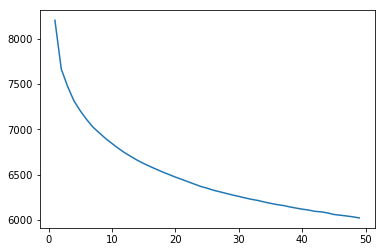

In [25]:
elbow_plot(embeddings_whole, maxK=50)

In [47]:
closest

array([4633, 8704, 1617, 9776, 8830, 3165, 2148, 5838, 1592, 3516, 2461,
       1063, 1140, 2655, 3833, 6662, 4265, 6493, 3705, 2736])

In [103]:
{i: len(np.where(kmeans.labels_ == i)[0]) for i in range(kmeans.n_clusters)}


{0: 442,
 1: 447,
 2: 400,
 3: 484,
 4: 387,
 5: 268,
 6: 480,
 7: 330,
 8: 423,
 9: 460,
 10: 475,
 11: 447,
 12: 330,
 13: 236,
 14: 400,
 15: 515,
 16: 540,
 17: 658,
 18: 486,
 19: 399}

In [111]:
for k in range(14,15):
    cluster_messages=[]
    cluster_embedding=[]
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i]==k:
            cluster_messages.append(messages1[i])
            cluster_embedding.append(embeddings_whole[i])
    d = kmeans.transform(cluster_embedding)[:, k]
    ind = np.argsort(d)[::-1]  
    temp= np.array(cluster_messages)[ind]
#     df11 = pd.DataFrame(np.array(cluster_messages)[ind])
#     df11.to_excel('cluster'+str(k)+'.xlsx', header=False, index=False)

# Clustering based on average of three vector embedding

In [126]:
messages_2=[]
messages1_2=[]
for index,row in mains.iterrows():
    messages1_2.append(row['text'])
    text=""
    all_rels_str, all_rels = [], []
    t_orig = row['text']
    t_orig = t_orig.replace("(","")
    t_orig = t_orig.replace(")","")
    t_orig = t_orig.replace("\n",".")
    t_orig = t_orig.replace(".",". ")
    t_sentences = sent_tokenize(t_orig)
    for i in range(len(t_sentences)):
        for v in set_three:
            if v in t_sentences[i]:
                if i>1:
                    text=text+t_sentences[i-1]
                text=text+t_sentences[i]
                if i<len(t_sentences)-1:
                    text=text+t_sentences[i+1]
                break
    messages_2.append(text)

In [127]:
tf.logging.set_verbosity(tf.logging.ERROR)
embeddings_whole_2=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings_whole_2 = session.run(embed(messages_2))
kmeans_2 = KMeans(n_clusters=20, random_state=0).fit(embeddings_whole_2)

In [125]:
{i: len(np.where(kmeans_2.labels_ == i)[0]) for i in range(kmeans_2.n_clusters)}


{0: 453,
 1: 383,
 2: 424,
 3: 528,
 4: 530,
 5: 650,
 6: 236,
 7: 300,
 8: 504,
 9: 411,
 10: 366,
 11: 407,
 12: 341,
 13: 422,
 14: 523,
 15: 529,
 16: 329,
 17: 280,
 18: 513,
 19: 478}

In [ ]:
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i]==9:
        if len(messages[i])<500:
            print messages[i]
            print "========================================="
            print "========================================="

# Second case: narrow filter

In [125]:
messages_2=[]
for index,row in df_new_reports_five.iterrows():
    messages_2.append(row['text'])


In [126]:
tf.logging.set_verbosity(tf.logging.ERROR)
embeddings_whole_2=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings_whole_2 = session.run(embed(messages_2))

In [139]:
{i: len(np.where(kmeans2.labels_ == i)[0]) for i in range(kmeans2.n_clusters)}

{0: 29,
 1: 89,
 2: 90,
 3: 93,
 4: 102,
 5: 82,
 6: 108,
 7: 139,
 8: 91,
 9: 159,
 10: 83,
 11: 109,
 12: 77,
 13: 77,
 14: 94,
 15: 89,
 16: 108,
 17: 143,
 18: 88,
 19: 83}

In [141]:
for i in range(len(kmeans2.labels_)):
    if kmeans2.labels_[i]==2:
        if len(messages_2[i])<10000:
            print messages_2[i]
            print "========================================="
            print "========================================="

My sister and I planned a trip, but the weather was bad, so I went alone. I went to the observation platform atop the Empire State Building. It was so foggy that I could not see anything.
I took a voyage on water and then on land.
The first scene was a coastal beach. Three whale type fish swam up on the beach and remained there momentarily stranded. They then turned around and swam out to sea quickly. Next I found myself swimming endlessly in the ocean. No place was evident as my destination. Then I found myself riding the surf towards shore. It was an exhilarating feeling. I felt very pleased with its occurrence. I only came in on a wave once. The next moment I found myself sneaking around an island inhabited by apparently some aliens. It reminded me of James Bond on the island in Dr. No. I was with some others, but I could not recall who they were. Excited, pleasant, no color Beach unknown
I was going to sail away on the blue ocean. My wheelchair was attached to the ship like a dingy

('k: ', 1)
('k: ', 2)
('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)
('k: ', 10)
('k: ', 11)
('k: ', 12)
('k: ', 13)
('k: ', 14)
('k: ', 15)
('k: ', 16)
('k: ', 17)
('k: ', 18)
('k: ', 19)
('k: ', 20)
('k: ', 21)
('k: ', 22)
('k: ', 23)
('k: ', 24)
('k: ', 25)
('k: ', 26)
('k: ', 27)
('k: ', 28)
('k: ', 29)
('k: ', 30)
('k: ', 31)
('k: ', 32)
('k: ', 33)
('k: ', 34)
('k: ', 35)
('k: ', 36)
('k: ', 37)
('k: ', 38)
('k: ', 39)
('k: ', 40)
('k: ', 41)
('k: ', 42)
('k: ', 43)
('k: ', 44)
('k: ', 45)
('k: ', 46)
('k: ', 47)
('k: ', 48)
('k: ', 49)


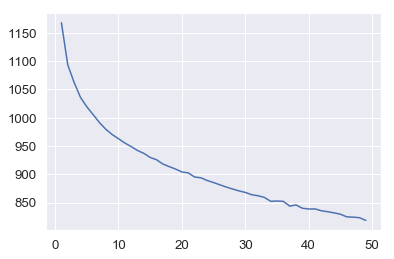

In [135]:
elbow_plot(embeddings_whole_2, maxK=50)

# Now let's try sentence wise:


In [143]:
all_sent = []
label=[]
for i, row in mains.iterrows(): # should change for all data
    t_orig = row['text']
    t_orig = t_orig.replace("(","")
    t_orig = t_orig.replace(")","")
    t_orig = t_orig.replace("\n",".")
    t_orig = clean_sent(t_orig)
    t_sentences = sent_tokenize(t_orig)
    for t_ind, t in enumerate(t_sentences):
        label.append(i)
        all_sent.append(t) 

        

In [149]:
tf.logging.set_verbosity(tf.logging.ERROR)
all_sent_embedding=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    all_sent_embedding = session.run(embed(all_sent))

In [ ]:
elbow_plot(embeddings_whole_2, maxK=50)

In [165]:
print len(all_sent_embedding), len(all_sent)


255813 255813


Let's implement this idea: 
Give a text find the optimal number of cluster:
fo instance:
Based on correlation we can decide what is the situation and then use SRL.

In [26]:
sample_text="I was at the airport. I wanted to get something. but I did not know what. because all there was this little stuffed animals stuck together. and I did not like that. Then I saw the perfect thing. it was a little glass wolf with some pups. Then I got onto the phone. after I bought it. and we arrived in vacation state."
print sample_text

I was at the airport. I wanted to get something. but I did not know what. because all there was this little stuffed animals stuck together. and I did not like that. Then I saw the perfect thing. it was a little glass wolf with some pups. Then I got onto the phone. after I bought it. and we arrived in vacation state.


In [28]:
t_sentences = sent_tokenize(sample_text)
sample_embedding=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    sample_embedding = session.run(embed(t_sentences))

In [29]:
message_embeddings=sample_embedding
n=len(message_embeddings)
for i in range(n-1):
    message_embeddings=np.append(message_embeddings,[(message_embeddings[i]+message_embeddings[i+1])/2],axis=0)
for i in range(n-2):
    message_embeddings=np.append(message_embeddings,[(message_embeddings[i]+message_embeddings[i+1]+message_embeddings[i+2])/3],axis=0) 

In [49]:
print np.inner(message_embeddings[0],message_embeddings[len(sample_embedding)-1])
print np.inner(message_embeddings[1],message_embeddings[len(sample_embedding)-1])

0.488407
0.335827


In [33]:
print t_sentences

['I was at the airport.', 'I wanted to get something.', 'but I did not know what.', 'because all there was this little stuffed animals stuck together.', 'and I did not like that.', 'Then I saw the perfect thing.', 'it was a little glass wolf with some pups.', 'Then I got onto the phone.', 'after I bought it.', 'and we arrived in vacation state.']


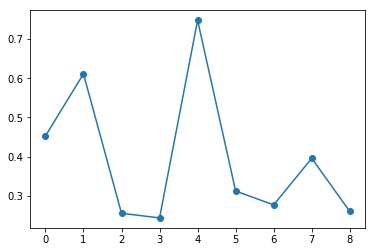

In [34]:
corre=[]
n=len(sample_embedding)
for i in range(n-1):
    corre.append(np.inner(message_embeddings[i],message_embeddings[i+1]))
plt.plot(corre,'o-')

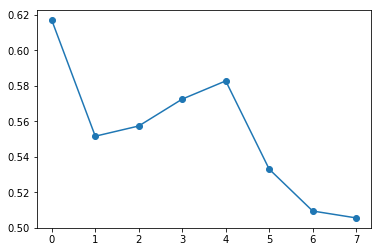

In [31]:
corre=[]
n=len(sample_embedding)
for i in range(n-2):
    corre.append(np.inner(message_embeddings[i+n],message_embeddings[i+1+n]))
plt.plot(corre,'o-')

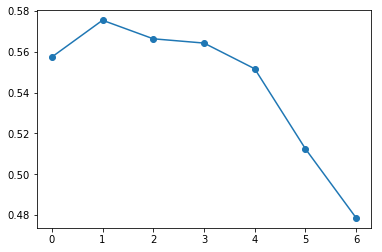

In [32]:
corre=[]
for i in range(n-3):
    corre.append(np.inner(message_embeddings[i+2*n-1],message_embeddings[i+1+2*n-1]))
plt.plot(corre,'o-')

The first thing I remember is being on another school trip, bringing about 3 or 4 bags of luggage, and forgetting it in the hotel. I also lost my CD's. I thought someone took them and threw them somewhere because they did not like the bands that I listened to. There were a lot of CD's lying around, but none of them were mine. Then, I realized all my CD's were in the case in my pocket.
('k: ', 1)
('k: ', 2)
('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)
('k: ', 10)
('k: ', 11)


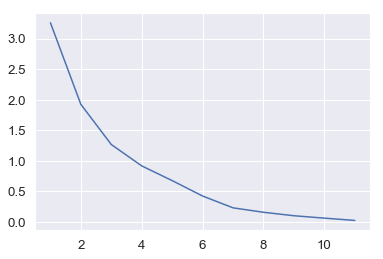

In [222]:
index=0
while label[index] != 18:
    index=index+1
for i, row in mains.iterrows(): # should change for all data
    t_orig = row['text']
#     print t_orig,i
    if i==18:
        print t_orig
        break
    if i>100:
        break
j=index
t_sentences = sent_tokenize(t_orig)
sample_embedding=[]
while label[j]==18:
    j=j+1
    sample_embedding.append(all_sent_embedding[j])
for i in range(len(t_sentences)-1):
    sample_embedding.append((sample_embedding[i]+sample_embedding[i+1])/2)
for i in range(len(t_sentences)-2):
    sample_embedding.append((sample_embedding[i]+sample_embedding[i+1]+sample_embedding[i+2])/3)
elbow_plot(sample_embedding, maxK=len(sample_embedding))

In [ ]:
number_sample=21

I'm outside, and there's this animal that I think to be a fox. Then I see a little dog that had been beaten up. It looked like a black lab. Then the fox took me by surprise and threw the nearly dead dog on top of me, as if he was taking us both for dead. We were both on the ground. I thought by that by that time the dog was undoubtedly dead, but found that he was still breathing and making noise. I was furious at the fox for doing this to the poor dog. There was a car trying to get through, and I carefully moved the dog to the side of the road. I really did not think the dog would make it, and I was almost hoping for someone to put him out of his misery but I really wanted to protect the dog and was hoping that he just might be ok. I picked up the fox, who gave a good fight and had claws, but I had to get him away from the dog so he did not hurt him any more. Then I attempted to throw the fox as far as possible. In the dream, I assumed the fox to be ok anyway, and if I threw him over a

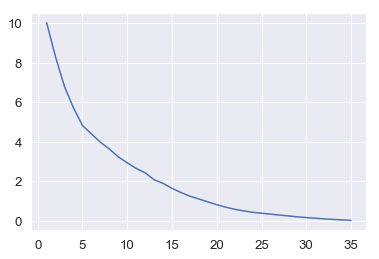

In [228]:
index=0
while label[index] != number_sample:
    index=index+1
for i, row in mains.iterrows(): # should change for all data
    t_orig = row['text']
    if i==number_sample:
        print t_orig
        break
    if i>100:
        break
print index
j=index
t_sentences = sent_tokenize(t_orig)
sample_embedding=[]
while label[j]==number_sample:
    j=j+1
    sample_embedding.append(all_sent_embedding[j])
for i in range(len(t_sentences)-1):
    sample_embedding.append((sample_embedding[i]+sample_embedding[i+1])/2)
for i in range(len(t_sentences)-2):
    sample_embedding.append((sample_embedding[i]+sample_embedding[i+1]+sample_embedding[i+2])/3)
elbow_plot(sample_embedding, maxK=len(sample_embedding))

In [ ]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    run_and_plot2(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

In [3]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
    message_embeddings_ = session_.run(
    encoding_tensor, feed_dict={input_tensor_: messages_})
    plot_similarity(messages_, message_embeddings_, 90)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

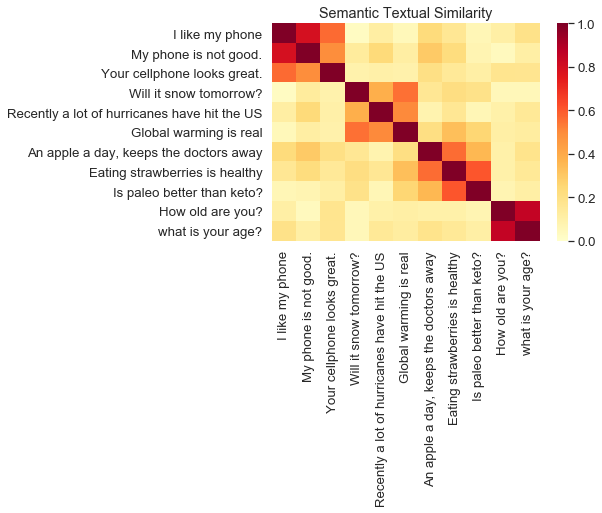

In [38]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

In [47]:
def plot_similarity2(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
#       xticklabels=labels,
#       yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot2(session_, input_tensor_, messages_, encoding_tensor):
    message_embeddings_ = session_.run(
    encoding_tensor, feed_dict={input_tensor_: messages_})
    plot_similarity2(messages_, message_embeddings_, 90)

# Place finder:

In [ ]:
import csv
places=[]
f = open('places.csv', 'rb')
reader = csv.reader(f)
for row in reader:
    places.append(row)
f.close()
tf.logging.set_verbosity(tf.logging.ERROR)
embeddings_whole=[]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings_whole = session.run(embed(messages))

In [ ]:
def findLocation(t_orig):
    t_sentences = sent_tokenize(t_orig)
    result=[]
    for t_ind, t in enumerate(t_sentences):
        t_annotated = annotator.getAnnotations(t, dep_parse=True)
        ner=t_annotated['ner']
        for p1,p2 in ner:
            if p2=='S-LOC':
                result.append(p1)
    return result